## Homework 1
1. Perform <b>Adaptive Background Subtraction</b>. i.e., <i>S(t)=abs(I(t)-B(t))</i> where <i>B(t)</i> is the adaptive background image.
2. Perform <b>Foreground Detection</b>. i.e., <i>F(t)=I(t) if S(t) > Threshold</i>
3. Show the captured image <i>I(t)</i>, the adaptive background image <i>B(t)</i>, the subtracted image <i>S(t)</i>, and the foreground image <i>F(t)</i>.
4. Adjust the alpha value and observe the result.
5. Any idea on how to generate a better Adaptive Background Image? Try it and compare the results.
6. Write down your observation and comparison at the end of your code by adding an individual cell in Jupyter.
7. Upload your Jupyter code file (*.ipynb)
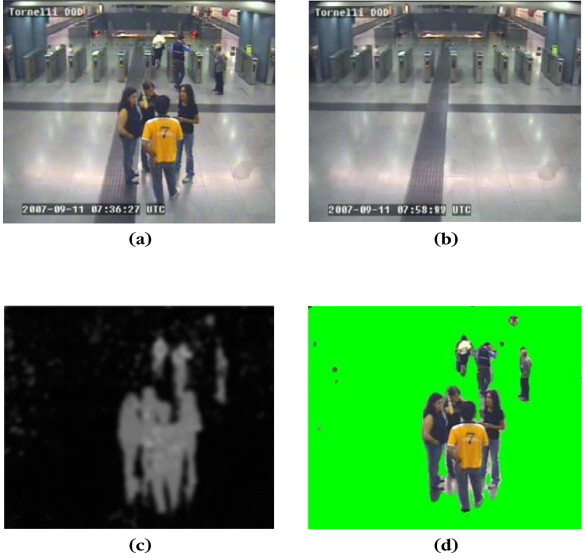

## 執行後會跳出四個視窗，分別為
- captured image I(t)
- adaptive background image B(t)
- subtracted image S(t)
- foreground image F(t)
- 分別對應為(a)(b)(c)(d)

#### 報告放在code cell 的後面


In [38]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture("D:\\google_download\\video-1647621268_Trim.mp4") 測試用影片

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# alpha value for the adaptive background and the subtracted image
alpha = 0.3
alpha_back = 0.995

ret, frame = cap.read()
#resize all frame as 0.8 compare to the origial window
cur_frame = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
mhi_frame = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
move = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
foreground = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)

while True:
    #read from cam
    ret, frame = cap.read()
    
    
    
    #show current image
    cur_frame = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
    cv2.imshow('captured image(a)',cur_frame)
    
    #show adaptive background image
    mhi_frame = cv2.addWeighted(mhi_frame, alpha_back, cur_frame, 1-alpha_back, 0)
    cv2.imshow('Adaptive Background(b)', mhi_frame)
    
    
    
    #subtracted image
    move = cv2.addWeighted(move, alpha, cur_frame, 1-alpha, 0)
    #the absolute value of the current frame and the substract frame
    subtracted = cv2.absdiff(cur_frame , move)
    #turn the frame into grayscale using BGR2GRAY
    subtracted = cv2.cvtColor(subtracted, cv2.COLOR_BGR2GRAY)
    #*5+20 making the grayscale looks brighter 
    cv2.imshow('subtracted image(c)', subtracted*5)
    subtracted = subtracted*5
    
    
    #foreground image
    #getting the height and width for the frame
    height, width = subtracted.shape
    #check every pixel, if the grayscale value is lower then 6, then turn it into green
    for y in range(0,height):
        for x in range(0,width):
            if subtracted[y][x] < 6:
                foreground[y,x,:] = [0,255,0]
            else:
                #keep the moving pixel as the same pixel from current frame
                foreground[y,x,:] = cur_frame[y,x,:]
    cv2.imshow('foreground image(d)', foreground)
    

    c = cv2.waitKey(1)
    #press esc to quit 
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

### <font color=#800000>Adjust the alpha value and observe the result</font>
- 當alpha的值上升，畫面中殘影停留的時間或隨著alpha的增加而越來越多，反之alpha的值減少所顯示的殘影也越短。所以在這邊可以觀察到若讓背景固定不受到突然進入畫面的物品影響就需要把alpha增大，也是實作 Adaptive Background需要注意的地方。
<br>

### <font color=#800000>Idea on how to generate a better Adaptive Background Image and </font>
- Adaptive Background 不能把移動的物體或人當成背景，需要長時間不移動才能讓該物品或人變成背景<br>所以在設定 Adaptive Background的時候需要把alpha值增加。所以當有人或物品進到當下畫面，在短時間內該物件不會變成背景。必須長時間固定在畫面裡才會逐漸變成背景，而時間長短隨著alpha變化。
- 在這次的作業中因為是要求Adaptive Background，所以我把alpha調整為0.995，當新物件進入畫面中需要花一段時間才會變成背景，實作如(b)的視窗所顯示。若物件一進入畫面又離開將不會變為背景
<br>

### <font color=#800000>Observation and comparison</font>
- 在上一段所提到，若alpha值太小，剛進來畫面的物件殘影較小會造成Adaptive Background一下就把該物件融為背景，但是在做視窗(c)subtracted image S(t)時，若alpha值過大的話，可能剛進來的物件持續在在畫面中移動，造成他所經過的地方會留下模糊(霧霧)的影像。<br>而模糊影像在轉灰階時(BGR2GRAY)會形成scale較白的顏色，造成我們無法區分哪些是我們所需要保留的正在移動影像，而不利於在視窗(d)把背景轉為綠色時判斷，所以在撰寫(c)視窗的灰階影像時的alpha值不能過大。
- 做完(c)視窗後我們得到每張圖片的灰階值後，需要遍歷過每張圖片的每個pixel，設定若該pixel的灰階程度低於某值(我設定為6)，那就判斷該pixel為不變的背景，故把該pixel轉為綠色背景如範例所示。但因為每一個frame需要遍歷所有pixel，時間複雜度會比較高，為O(hw)，h為長度而w為寬度，造成運行時速度明顯的變慢。
<br>

### <font color=#800000>Conclution</font>
- 不同alpha值對於Adaptive Background的影響很大。
    - 在高alpha值時殘影停留時間較長
    - 低alpha值時殘影停留時間較短
<br>

### <font color=#800000>Improvement</font>
- 把背景更改為綠色需要花大量時間執行，或許有更佳的做法可以減少時間複雜度。
- 有些正在移動中的物件的某部分跟能跟背景相似，故會被列入背景。當再轉換綠色背景時就會被一同合併為背景
- 移動中的物件可能會造成影子或是光源的變化，程式會把這些東西也當成移動中的物件而不是背景


#### 在一開始啟動相機時的４個視窗，因為背景無新的物件進入，所以視窗(c)(d)分別為全黑與全綠
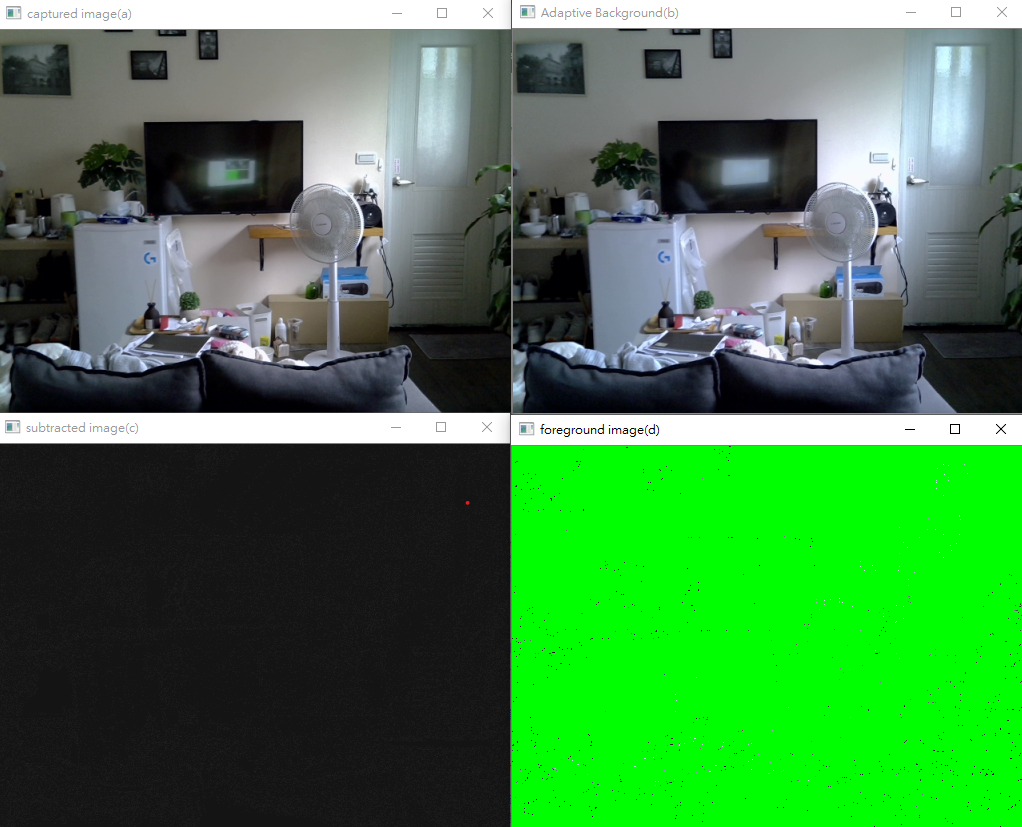

#### 當移動物件(我的手)進入畫面後的四個視窗，可以看到除了移動中的物件，(c)(d)背景都還是為黑色或是綠色
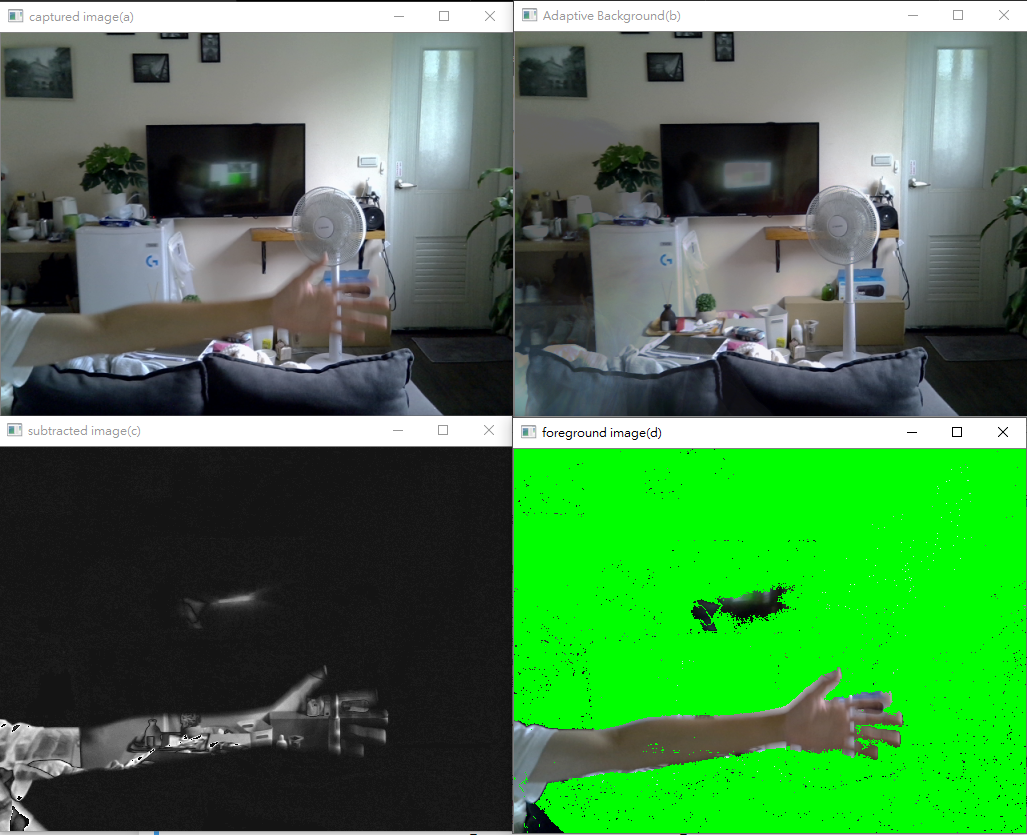
   

### 以下程式碼可以看出當alpha值不同時所造成的差異
#### 分別為
- alpha = 0.3
- alpha = 0.95

In [30]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# alpha value 
alpha = 0.6
alpha2 = 0.95

ret, frame = cap.read()
cur_frame = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
frame1 = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
frame2 = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)


while True:
    #read from cam
    ret, frame = cap.read()
    
    cur_frame = cv2.resize(frame, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
    frame1 = cv2.addWeighted(frame1, alpha, cur_frame, 1-alpha, 0)
    cv2.imshow('alpha = 0.3', frame1)
    frame2 = cv2.addWeighted(frame2, alpha2, cur_frame, 1-alpha2, 0)
    cv2.imshow('alpha = 0.9', frame2)
    
    c = cv2.waitKey(1)
    #press esc to quit 
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()